In [ ]:
###---------------
# Project HIA302 Group B 
# Isaac Kong
# Adverse Event Following Immunization (aefi) Trends 
###----------------

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os, sys

In [2]:
#create data path to access data file from path 
data_path="vaccination/"

# to show the all files in the data_path 
vax_files = os.listdir(data_path)
vax_files

['vax_district.csv',
 'vax_booster_combos.csv',
 'vax_demog_ethnicity.csv',
 'aefi.csv',
 'vax_outcomes_capita.csv',
 'vax_demog_highrisk.csv',
 'vax_demog_sex.csv',
 'vax_malaysia.csv',
 'README.md',
 'vax_state.csv',
 'aefi_serious.csv',
 'vax_demog_nationality.csv',
 'vax_snapshot.csv',
 '.ipynb_checkpoints',
 'vax_demog_age_children.csv',
 'vax_school.csv',
 'vax_demog_age.csv']

In [102]:
pd.read_csv(os.path.join(data_path, "aefi.csv")).describe()

,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,d1_site_redness,d1_tiredness,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,...,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,663.487837,1.220907,662.261670,16.099934,606.224852,39.944773,427.847469,98.744247,32.109139,327.448389,...,2.238659,18.797502,15.786982,10.345168,5.865878,10.736358,6.130178,5.038790,4.915187,1.603550
std,1296.677983,2.262360,1295.746836,32.543501,1237.919429,131.308975,927.087027,242.470757,78.417766,734.216588,...,7.552900,62.278923,49.273572,35.737454,18.749222,34.865071,19.075960,17.567253,16.167464,5.800745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,20.000000,3.000000,8.000000,0.000000,6.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,679.000000,2.000000,674.000000,14.000000,535.000000,21.000000,330.000000,58.000000,21.000000,234.000000,...,1.000000,10.000000,8.000000,5.000000,3.000000,5.000000,4.000000,2.000000,3.000000,1.000000
max,8905.000000,21.000000,8901.000000,374.000000,8810.000000,1787.000000,6854.000000,3839.000000,927.000000,5883.000000,...,111.000000,867.000000,679.000000,503.000000,266.000000,481.000000,216.000000,270.000000,199.000000,88.000000


In [3]:
# identify the extension (file type)
filename, filext = os.path.splitext(vax_files[8])

filext

if(filext == '.csv'):
    print('this is a CSV')
else:
    print('this is not a csv file')
filename

this is not a csv file


'README'

In [5]:
# to read the dataframe for aefi 
pd.read_csv(os.path.join(data_path, "aefi.csv"))

,date,vaxtype,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,daily_nonserious_mysj_dose1,daily_nonserious_mysj_dose2,d1_site_pain,d1_site_swelling,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,5,0,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,2,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,4,0,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,12,1,11,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,3,0,3,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# to read the dataframe for aefi_serious 
pd.read_csv(os.path.join(data_path, "aefi_serious.csv"))

,date,vaxtype,suspected_anaphylaxis,acute_facial_paralysis,venous_thromboembolism,myo_pericarditis
0,2021-05-09,astrazeneca,0,2,5,0
1,2021-05-09,cansino,0,0,0,0
2,2021-05-09,pfizer,31,37,15,2
3,2021-05-09,sinovac,8,27,10,0
4,2021-08-23,astrazeneca,0,1,2,0
5,2021-08-23,cansino,0,0,0,0
6,2021-08-23,pfizer,30,27,10,0
7,2021-08-23,sinovac,7,16,6,0
8,2021-09-23,astrazeneca,5,9,5,1
9,2021-09-23,cansino,0,0,0,0


In [7]:
### Create data repository holiding all datasets for vacincations 

data_repo = dict()

for file in vax_files:
    file_path = os.path.join(data_path, file)
    filename, filext = os.path.splitext(file)

    if(filext == ".csv"):
        print(file_path)
        tmp_df = pd.read_csv(file_path)
        data_repo[filename] = tmp_df.copy()
        
data_repo.keys()

vaccination/vax_district.csv
vaccination/vax_booster_combos.csv
vaccination/vax_demog_ethnicity.csv
vaccination/aefi.csv
vaccination/vax_outcomes_capita.csv
vaccination/vax_demog_highrisk.csv
vaccination/vax_demog_sex.csv
vaccination/vax_malaysia.csv
vaccination/vax_state.csv
vaccination/aefi_serious.csv
vaccination/vax_demog_nationality.csv
vaccination/vax_snapshot.csv
vaccination/vax_demog_age_children.csv
vaccination/vax_school.csv
vaccination/vax_demog_age.csv


dict_keys(['vax_district', 'vax_booster_combos', 'vax_demog_ethnicity', 'aefi', 'vax_outcomes_capita', 'vax_demog_highrisk', 'vax_demog_sex', 'vax_malaysia', 'vax_state', 'aefi_serious', 'vax_demog_nationality', 'vax_snapshot', 'vax_demog_age_children', 'vax_school', 'vax_demog_age'])

In [8]:
# Perform data check to identify missing value or data completeness 
aefi = data_repo['aefi'].copy()

aefi_serious = data_repo['aefi_serious'].copy()

print(aefi.info())
print(aefi_serious.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1521 entries, 0 to 1520
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   date                         1521 non-null   object
 1   vaxtype                      1521 non-null   object
 2   daily_total                  1521 non-null   int64 
 3   daily_serious_npra           1521 non-null   int64 
 4   daily_nonserious             1521 non-null   int64 
 5   daily_nonserious_npra        1521 non-null   int64 
 6   daily_nonserious_mysj_dose1  1521 non-null   int64 
 7   daily_nonserious_mysj_dose2  1521 non-null   int64 
 8   d1_site_pain                 1521 non-null   int64 
 9   d1_site_swelling             1521 non-null   int64 
 10  d1_site_redness              1521 non-null   int64 
 11  d1_tiredness                 1521 non-null   int64 
 12  d1_headache                  1521 non-null   int64 
 13  d1_muscle_pain               1521

In [9]:
# Merging of 2 dataframes (aefi & aefi_serious) into one by 'date' and 'vaxtype'
aefi_full = aefi_serious.merge(aefi, on=['date', 'vaxtype'], how='right')
aefi_full

,date,vaxtype,suspected_anaphylaxis,acute_facial_paralysis,venous_thromboembolism,myo_pericarditis,daily_total,daily_serious_npra,daily_nonserious,daily_nonserious_npra,...,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,NaN,NaN,NaN,NaN,5,0,5,5,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,NaN,NaN,NaN,NaN,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,NaN,NaN,NaN,NaN,4,0,4,4,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,NaN,NaN,NaN,NaN,12,1,11,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,NaN,NaN,NaN,NaN,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,NaN,NaN,NaN,NaN,3,0,3,1,...,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,NaN,NaN,NaN,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#data wrangling step 1 for dose 1

# dose 1 by date and vaxtype
aefi_ref = aefi_full[["date" , "vaxtype"]]

# to filter column for only d1_ (dose 1) AE
filter_col_d1 = [col for col in aefi_full if col.startswith('d1_')]
filter_col_d1

aefi_dose1 = aefi_full.loc[:, aefi_full.columns.str.startswith("d1_")]

# concatenate aefi 
aefi_dose1_final = pd.concat([aefi_ref,aefi_dose1],axis=1)
aefi_dose1_final 


,date,vaxtype,d1_site_pain,d1_site_swelling,d1_site_redness,d1_tiredness,d1_headache,d1_muscle_pain,d1_joint_pain,d1_weakness,d1_fever,d1_vomiting,d1_chills,d1_rash
0,2021-01-13,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,0,0,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,0,0,0,0,0,0,0,0,1,0,0,0
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
aefi_dose1_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1521 non-null   object
 1   vaxtype           1521 non-null   object
 2   d1_site_pain      1521 non-null   int64 
 3   d1_site_swelling  1521 non-null   int64 
 4   d1_site_redness   1521 non-null   int64 
 5   d1_tiredness      1521 non-null   int64 
 6   d1_headache       1521 non-null   int64 
 7   d1_muscle_pain    1521 non-null   int64 
 8   d1_joint_pain     1521 non-null   int64 
 9   d1_weakness       1521 non-null   int64 
 10  d1_fever          1521 non-null   int64 
 11  d1_vomiting       1521 non-null   int64 
 12  d1_chills         1521 non-null   int64 
 13  d1_rash           1521 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 178.2+ KB


In [14]:
#data wrangling step 1 for dose 2

# dose 2 by date and vaxtype
aefi_ref = aefi_full[["date" , "vaxtype"]]

filter_col_d2 = [col for col in aefi_full if col.startswith('d2_')]
filter_col_d2

# to filter column for only d2_ (dose 2) AE
aefi_dose2 = aefi_full.loc[:, aefi_full.columns.str.startswith("d2_")]

# concatenate aefi 
aefi_dose2_final = pd.concat([aefi_ref,aefi_dose2],axis=1)
aefi_dose2_final


,date,vaxtype,d2_site_pain,d2_site_swelling,d2_site_redness,d2_tiredness,d2_headache,d2_muscle_pain,d2_joint_pain,d2_weakness,d2_fever,d2_vomiting,d2_chills,d2_rash
0,2021-01-13,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-02-25,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-02-26,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-02-27,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-02-28,pfizer,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,2022-06-06,sinovac,0,0,0,0,0,0,0,0,0,0,0,0
1517,2022-06-07,astrazeneca,0,0,0,0,0,0,0,0,0,0,0,0
1518,2022-06-07,pfizer,1,1,1,1,1,1,1,1,1,1,1,1
1519,2022-06-07,sinopharm,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
aefi_dose2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1520
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1521 non-null   object
 1   vaxtype           1521 non-null   object
 2   d2_site_pain      1521 non-null   int64 
 3   d2_site_swelling  1521 non-null   int64 
 4   d2_site_redness   1521 non-null   int64 
 5   d2_tiredness      1521 non-null   int64 
 6   d2_headache       1521 non-null   int64 
 7   d2_muscle_pain    1521 non-null   int64 
 8   d2_joint_pain     1521 non-null   int64 
 9   d2_weakness       1521 non-null   int64 
 10  d2_fever          1521 non-null   int64 
 11  d2_vomiting       1521 non-null   int64 
 12  d2_chills         1521 non-null   int64 
 13  d2_rash           1521 non-null   int64 
dtypes: int64(12), object(2)
memory usage: 178.2+ KB


In [16]:
# data rearrangement Unpivot a DataFrame from wide to long format using pandas (pd.wide_to_long) for dose 1

# dose 1
aefi_dose1_l = pd.wide_to_long(aefi_dose1_final, stubnames='d1', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose1_l.rename(columns = {'d1':'count'}, inplace = True)
# 
aefi_dose1_l["dose"]=1
aefi_dose1_l

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     1
                       site_swelling      0     1
                       site_redness       0     1
                       tiredness          0     1
                       headache           0     1
...                                     ...   ...
2022-06-07 sinovac     weakness           0     1
                       fever              0     1
                       vomiting           0     1
                       chills             0     1
                       rash               0     1

[18252 rows x 2 columns]

In [17]:
# data rearrangement Unpivot a DataFrame from wide to long format using pandas (pd.wide_to_long) for dose 2

# dose 2
aefi_dose2_l = pd.wide_to_long(aefi_dose2_final, stubnames='d2', i=['date', 'vaxtype'], j='AE', sep="_", suffix=r'\w+')
aefi_dose2_l.rename(columns = {'d2':'count'}, inplace = True)
# 
aefi_dose2_l["dose"]=2
aefi_dose2_l

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     2
                       site_swelling      0     2
                       site_redness       0     2
                       tiredness          0     2
                       headache           0     2
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[18252 rows x 2 columns]

<AxesSubplot:title={'center':'Top 10 Adverse Events Following Immunization on Dose 1'}, ylabel='count'>

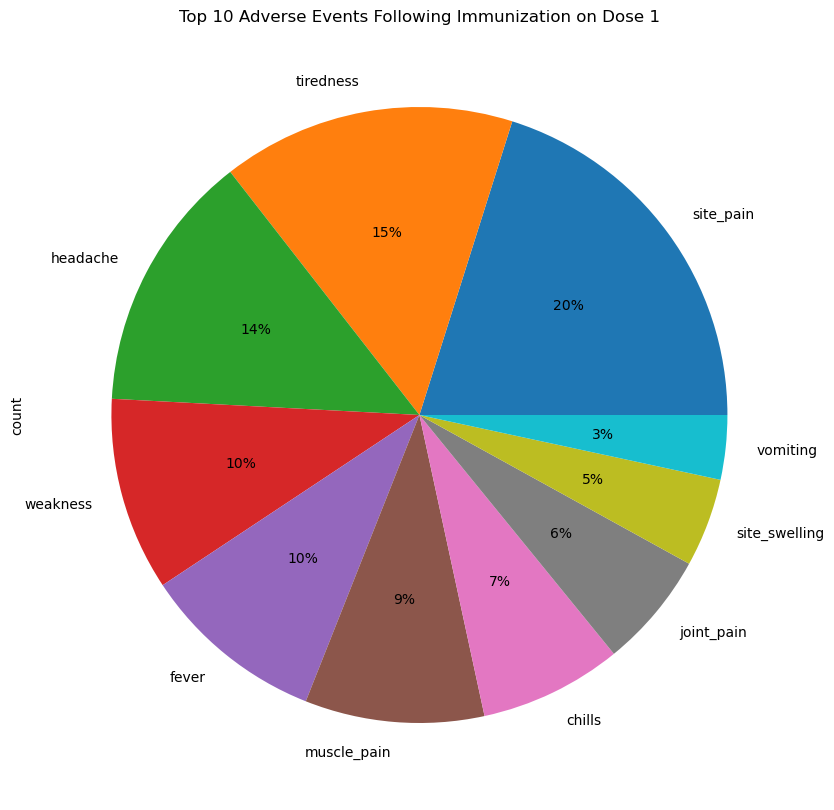

In [30]:
# dose1 AEFI Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose1_summ = aefi_dose1_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose1_summ.plot(kind='pie', y='count', figsize=(50,10), autopct='%1.0f%%',
                     title = 'Top 10 Adverse Events Following Immunization on Dose 1' )


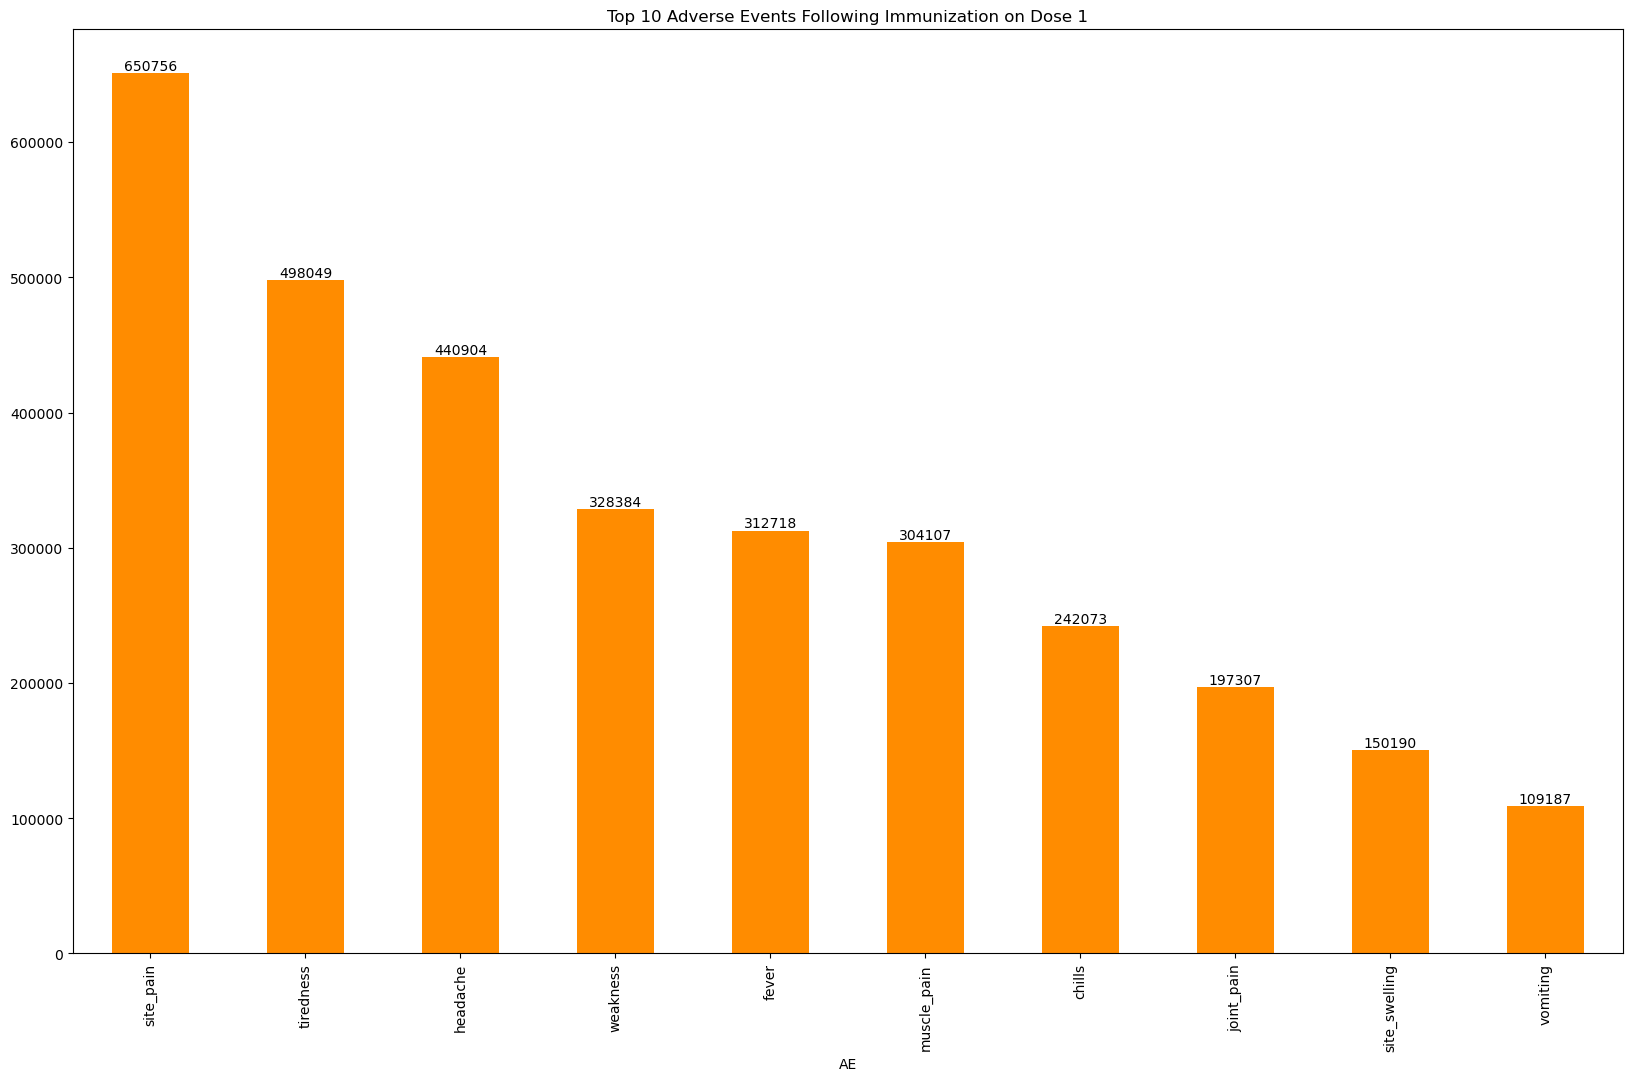

In [50]:
# dose1 bar chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose1_summ = aefi_dose1_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose1_summ_plt_bar = aefi_dose1_summ.plot(kind='bar', stacked=True,figsize=(20,12),
                                               title = 'Top 10 Adverse Events Following Immunization on Dose 1',
                                               color = {"darkorange"})

for container in aefi_dose1_summ_plt_bar.containers:
    aefi_dose1_summ_plt_bar.bar_label(container)

<AxesSubplot:title={'center':'Top 10 Adverse Events Following Immunization on Dose 1'}, ylabel='count'>

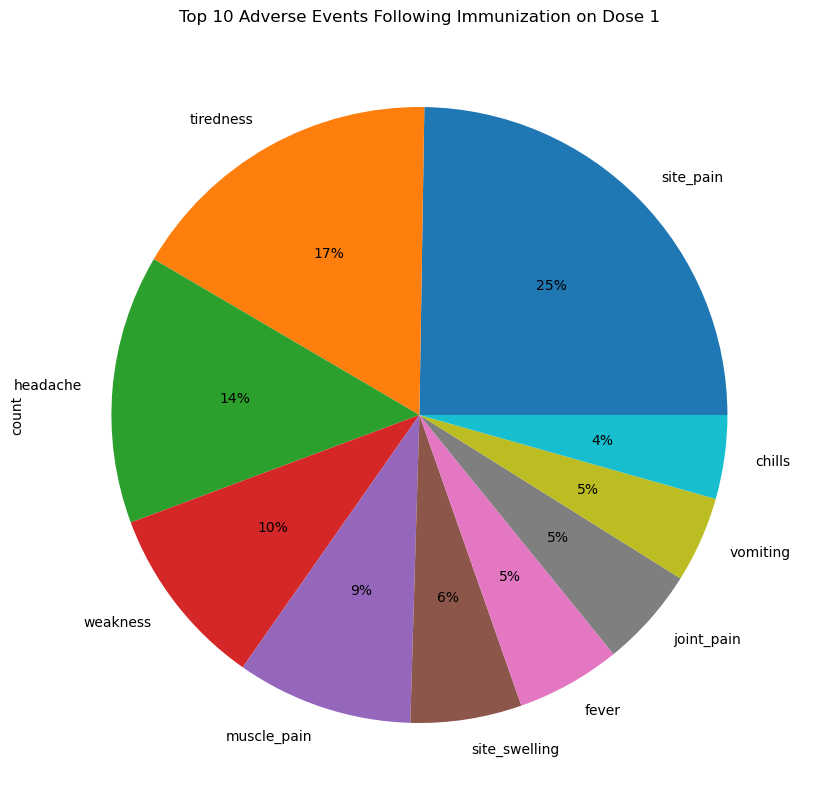

In [48]:
# dose 2 Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose2_summ = aefi_dose2_l.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose2_summ.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10),
                     title = 'Top 10 Adverse Events Following Immunization on Dose 1')

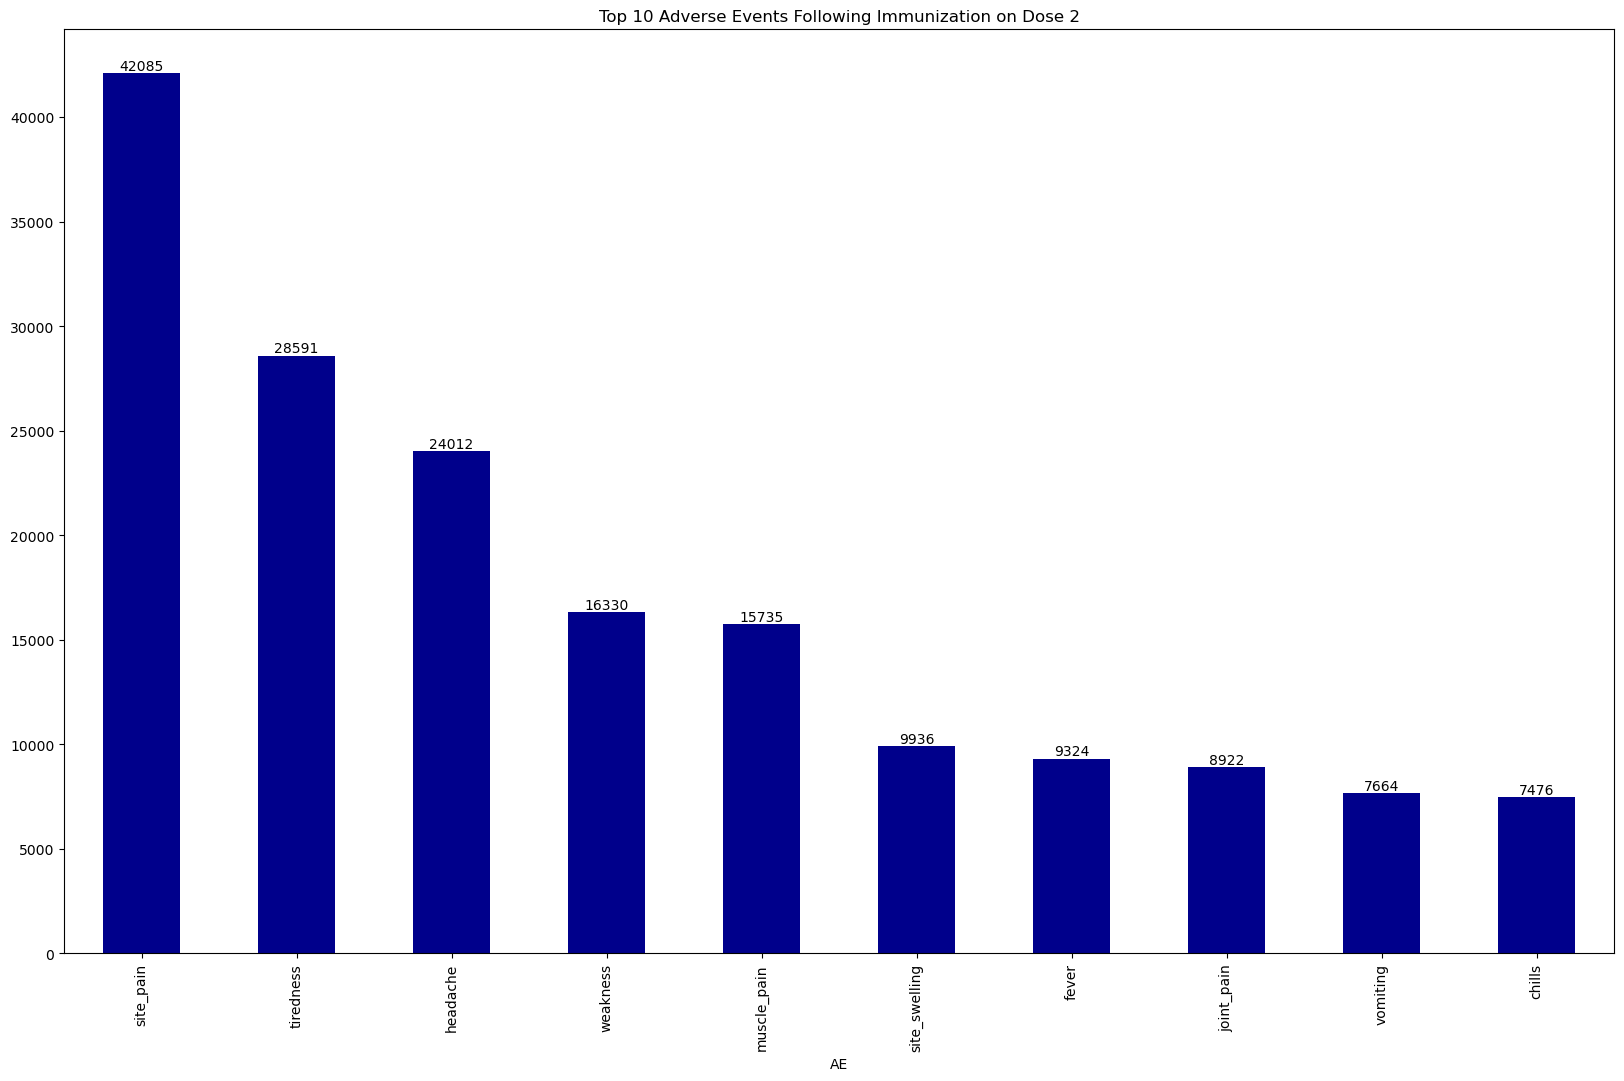

In [55]:
# dose2 bar chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose2_summ = aefi_dose2_l.groupby(['AE'])['count'].sum().nlargest(10)
plt = aefi_dose2_summ.plot(kind='bar', stacked=True,figsize=(20,12), 
                           title = 'Top 10 Adverse Events Following Immunization on Dose 2', 
                           color = "darkblue")

for container in plt.containers:
    plt.bar_label(container)

In [70]:
# dose 1 concatinate with dose 2 dataframe
aefi_dose12_final = pd.concat([aefi_dose1_l,aefi_dose2_l],axis=0)
aefi_dose12_final

count  dose
date       vaxtype     AE                        
2021-01-13 astrazeneca site_pain          0     1
                       site_swelling      0     1
                       site_redness       0     1
                       tiredness          0     1
                       headache           0     1
...                                     ...   ...
2022-06-07 sinovac     weakness           0     2
                       fever              0     2
                       vomiting           0     2
                       chills             0     2
                       rash               0     2

[36504 rows x 2 columns]

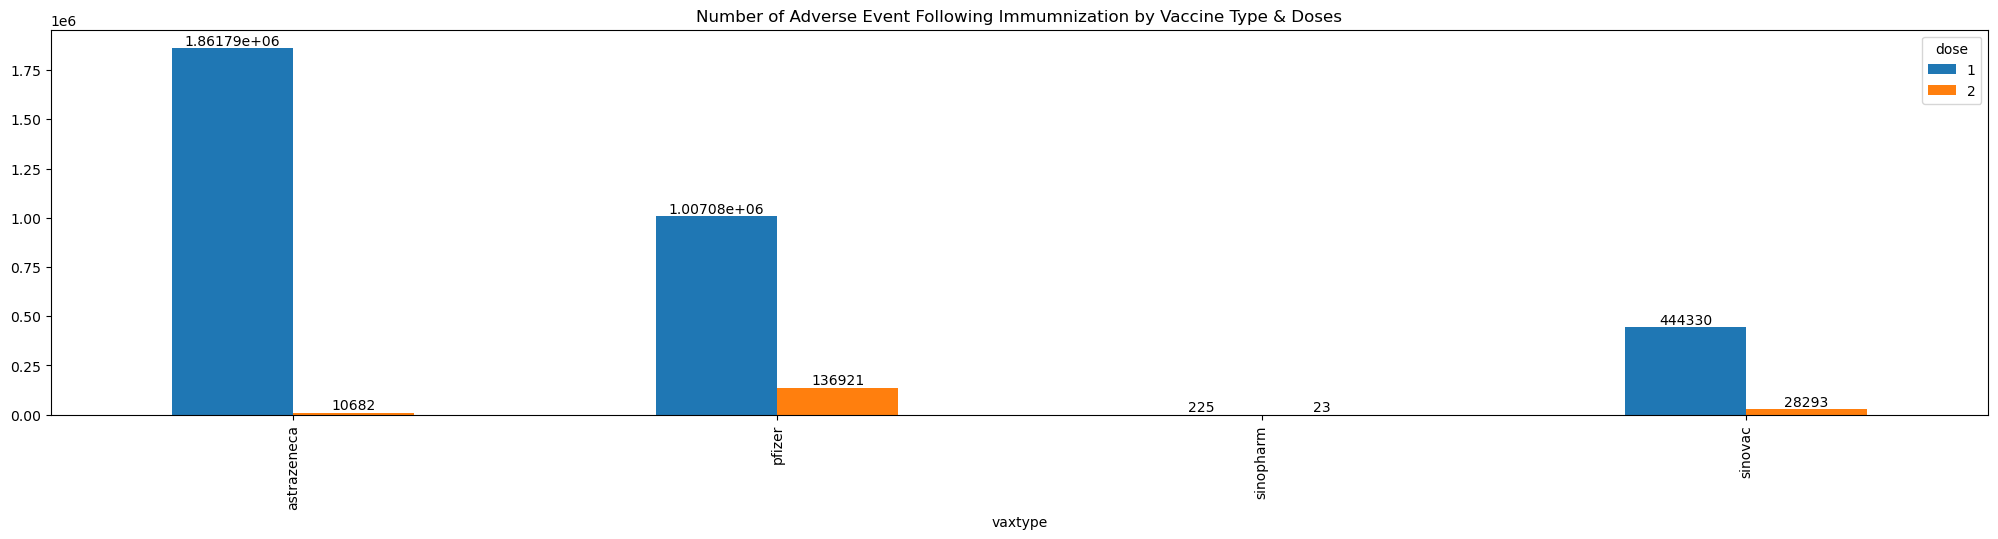

In [95]:
# barchart by vaccine brand
vaxtype_summ_ae = aefi_dose12_final.groupby(['vaxtype', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=False ,figsize=(25,5), 
                                                                                               title = 'Number of Adverse Event Following Immumnization by Vaccine Type & Doses')

plt_2 = vaxtype_summ_ae

for container in plt_2.containers:
    plt_2.bar_label(container)

<AxesSubplot:ylabel='count'>

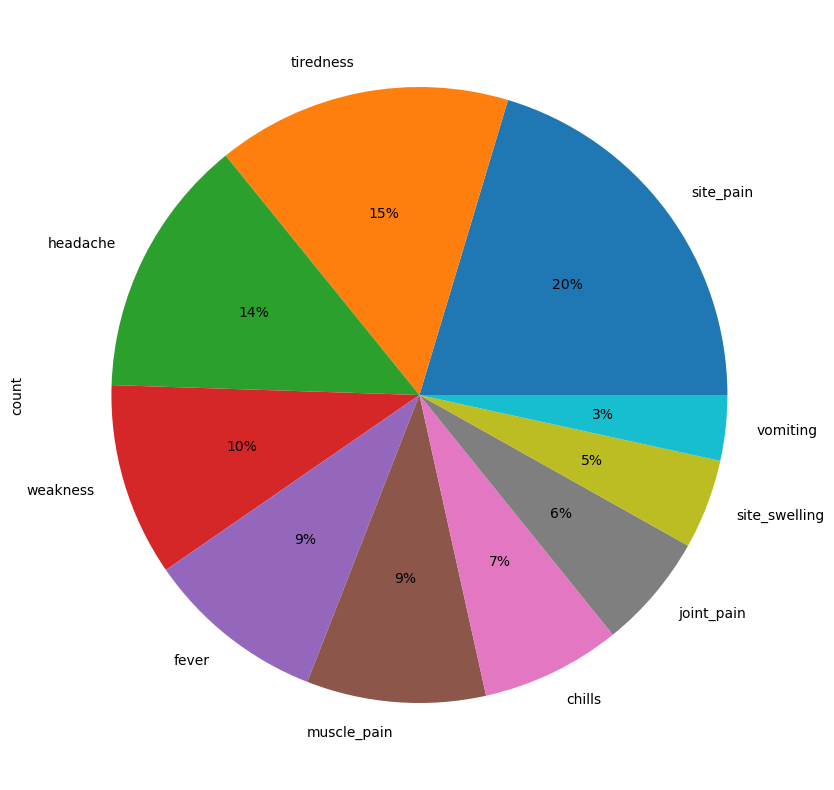

In [72]:
# regardless of dose (SAE inclusive) Pie chart, where the slices will be ordered and plotted counter-clockwise:
aefi_dose12_summ = aefi_dose12_final.groupby(['AE'])['count'].sum().nlargest(10)
aefi_dose12_summ.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10))

<AxesSubplot:ylabel='count'>

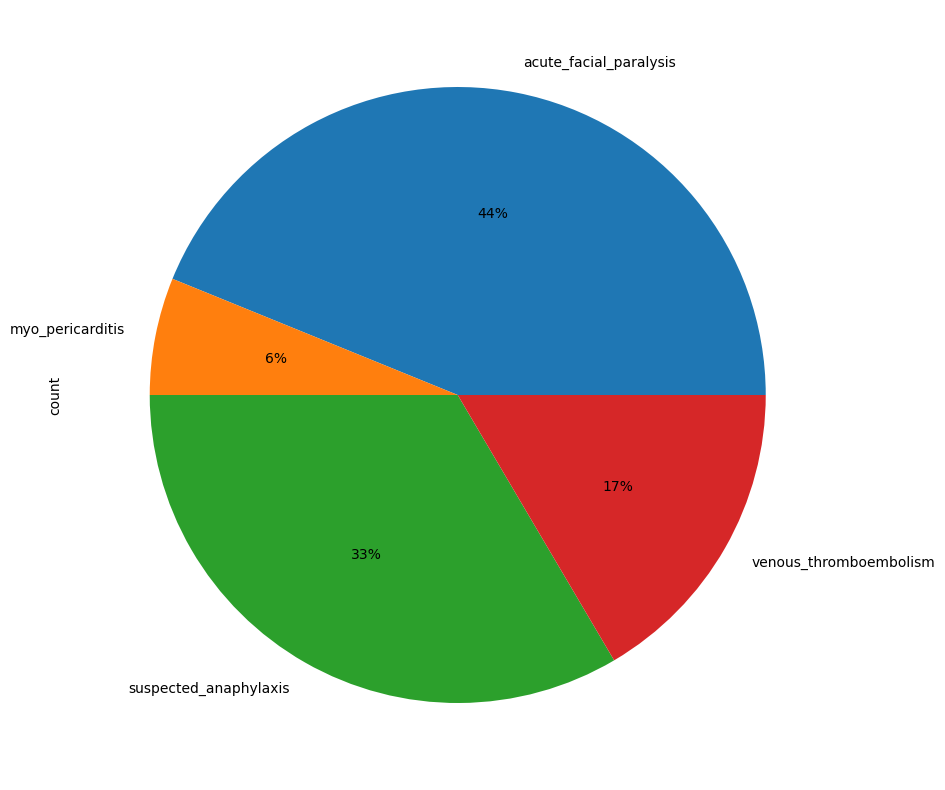

In [73]:
# Serious AE 
# aefi_serious = aefi_full[['date','vaxtype','suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis']]
aefi_serious
aefi_serious_l = pd.melt(aefi_serious, id_vars= ['date','vaxtype'], value_vars=['suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis'])

aefi_serious_l.rename(columns = {'value':'count','variable':'AE'}, inplace = True)
aefi_serious_l

aefi_serious_l_summ_pie = aefi_serious_l.groupby(['AE'])['count'].sum()
aefi_serious_l_summ_pie.plot(kind='pie', y='count', autopct='%1.0f%%',figsize=(50,10))


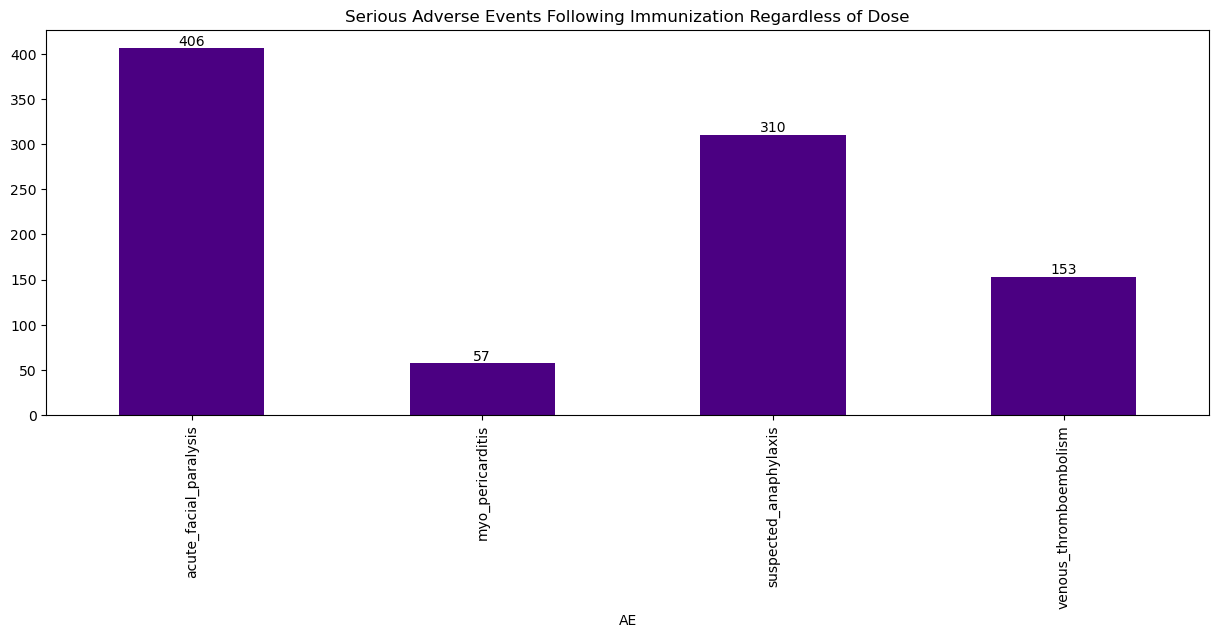

In [85]:
# Serious AE 
# aefi_serious = aefi_full[['date','vaxtype','suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis']]
aefi_serious
aefi_serious_l = pd.melt(aefi_serious, id_vars= ['date','vaxtype'], value_vars=['suspected_anaphylaxis','acute_facial_paralysis','venous_thromboembolism', 'myo_pericarditis'])

aefi_serious_l.rename(columns = {'value':'count','variable':'AE'}, inplace = True)
aefi_serious_l

aefi_serious_l_summ_bar = aefi_serious_l.groupby(['AE'])['count'].sum()
aefi_serious_l_summ_bar_plt = aefi_serious_l_summ_bar.plot(kind='bar', stacked=True, figsize=(15,5), 
                                                           title = 'Serious Adverse Events Following Immunization Regardless of Dose', 
                                                           color = "indigo")

for container in aefi_serious_l_summ_bar_plt.containers:
    aefi_serious_l_summ_bar_plt.bar_label(container)

[]

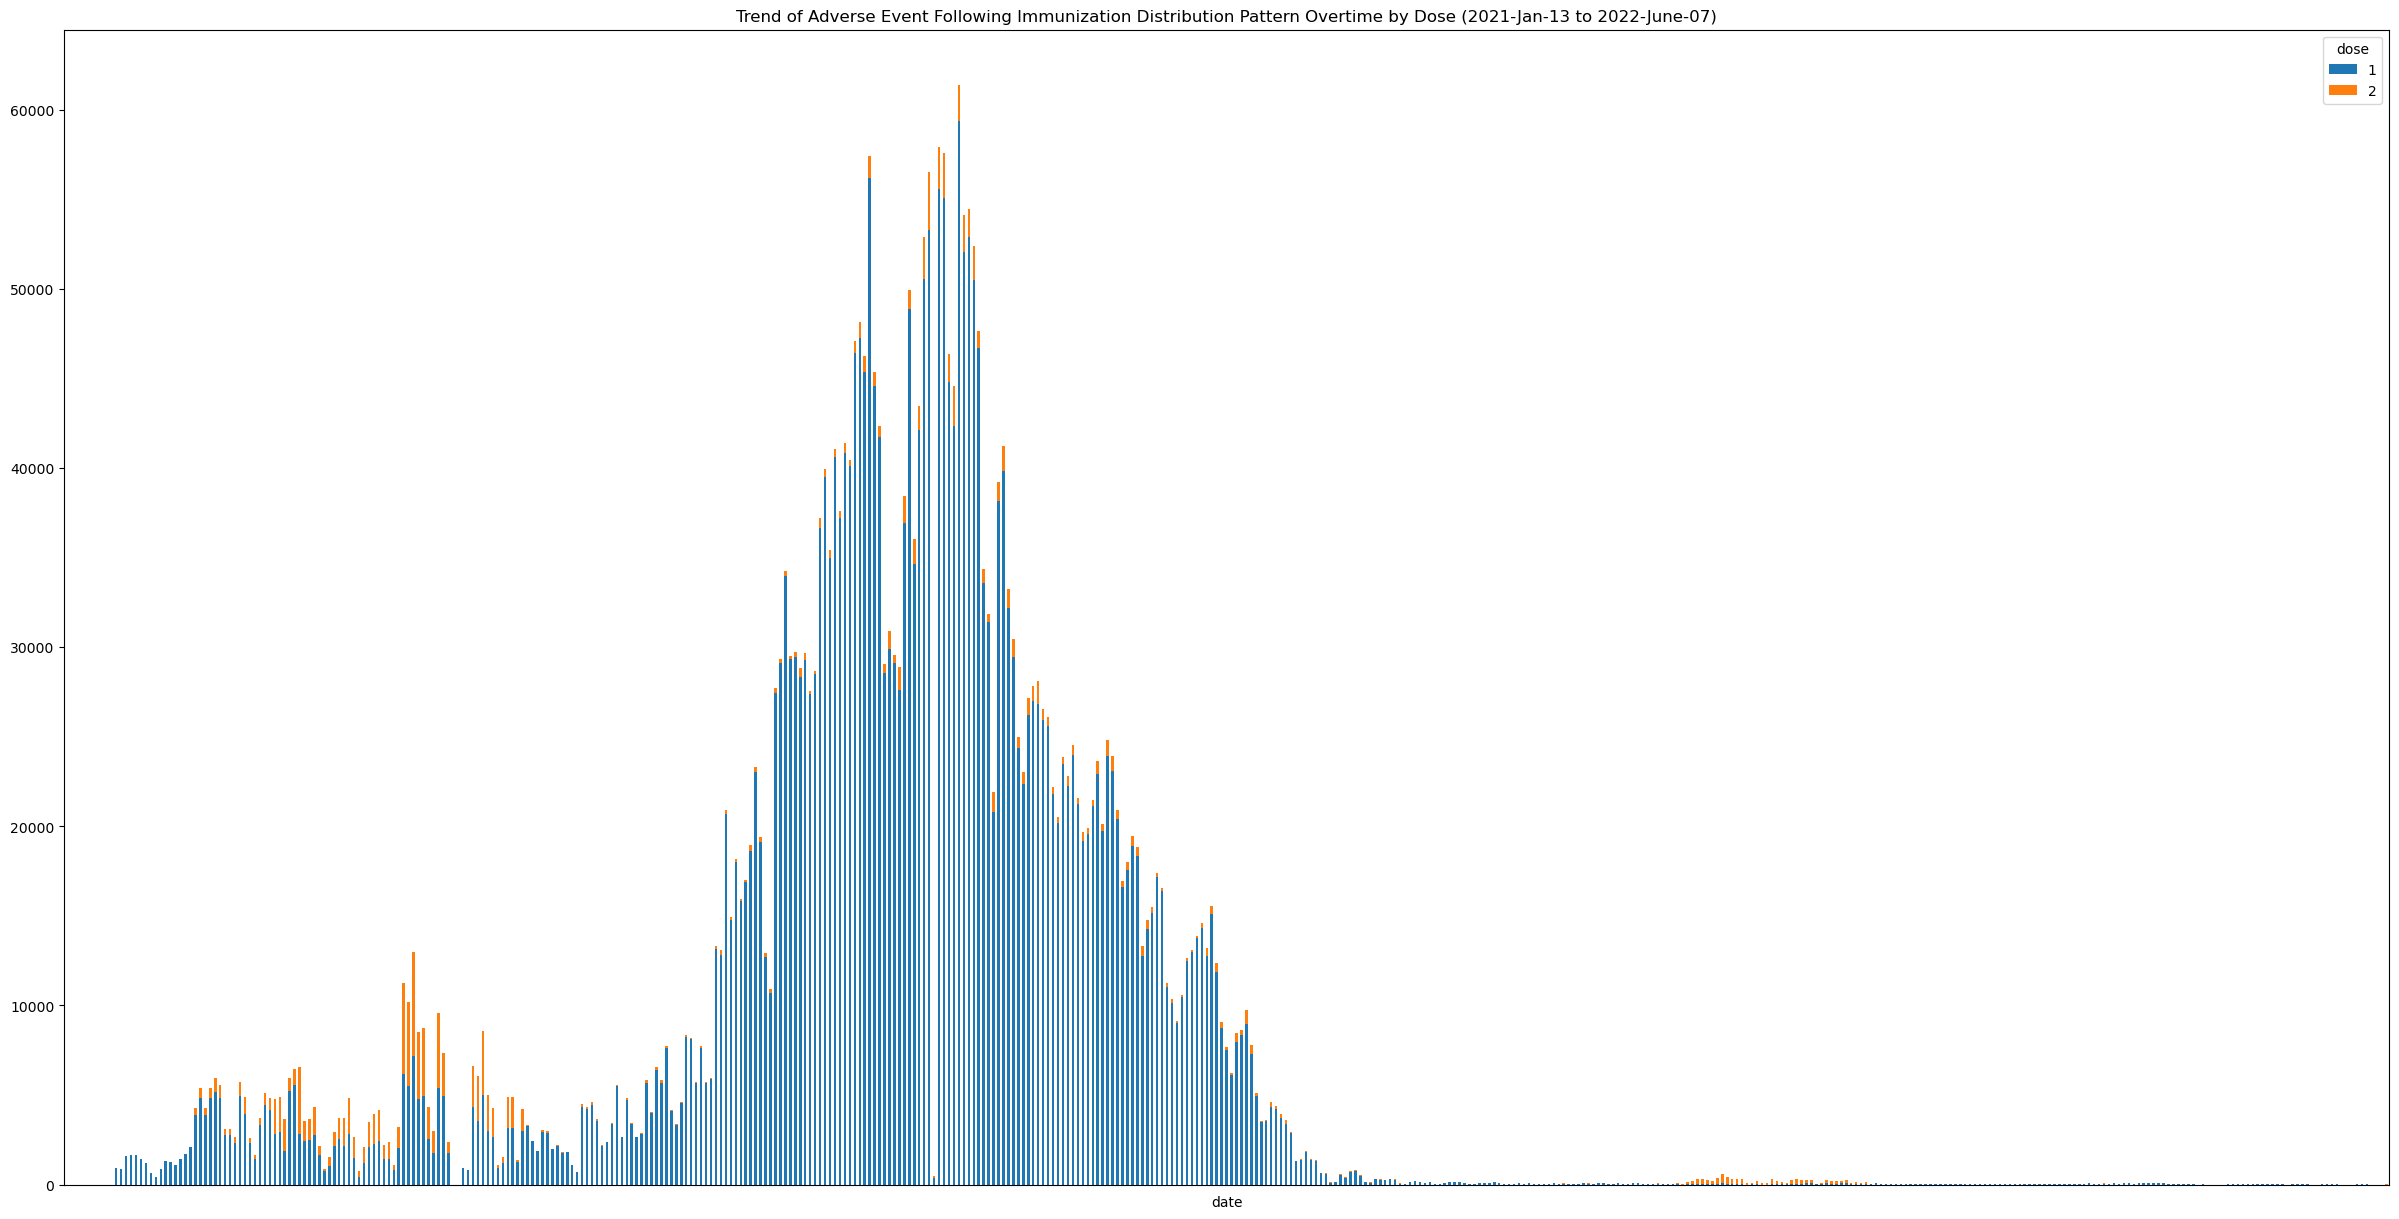

In [93]:
# trend of adverse event distribution pattern overtime by dosing 
aefi_by_time = aefi_dose12_final.groupby(['date', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=True, figsize=(30,15), 
                                                                                         title = 'Trend of Adverse Event Following Immunization Distribution Pattern Overtime by Dose (2021-Jan-13 to 2022-June-07)')
aefi_by_time.axes.get_xaxis().set_ticks([])

### adverse event shown decresing trend over time after peak 
### reasons (1) decreasing number of individual receiving vaccine 
### 

<AxesSubplot:xlabel='vaxtype'>

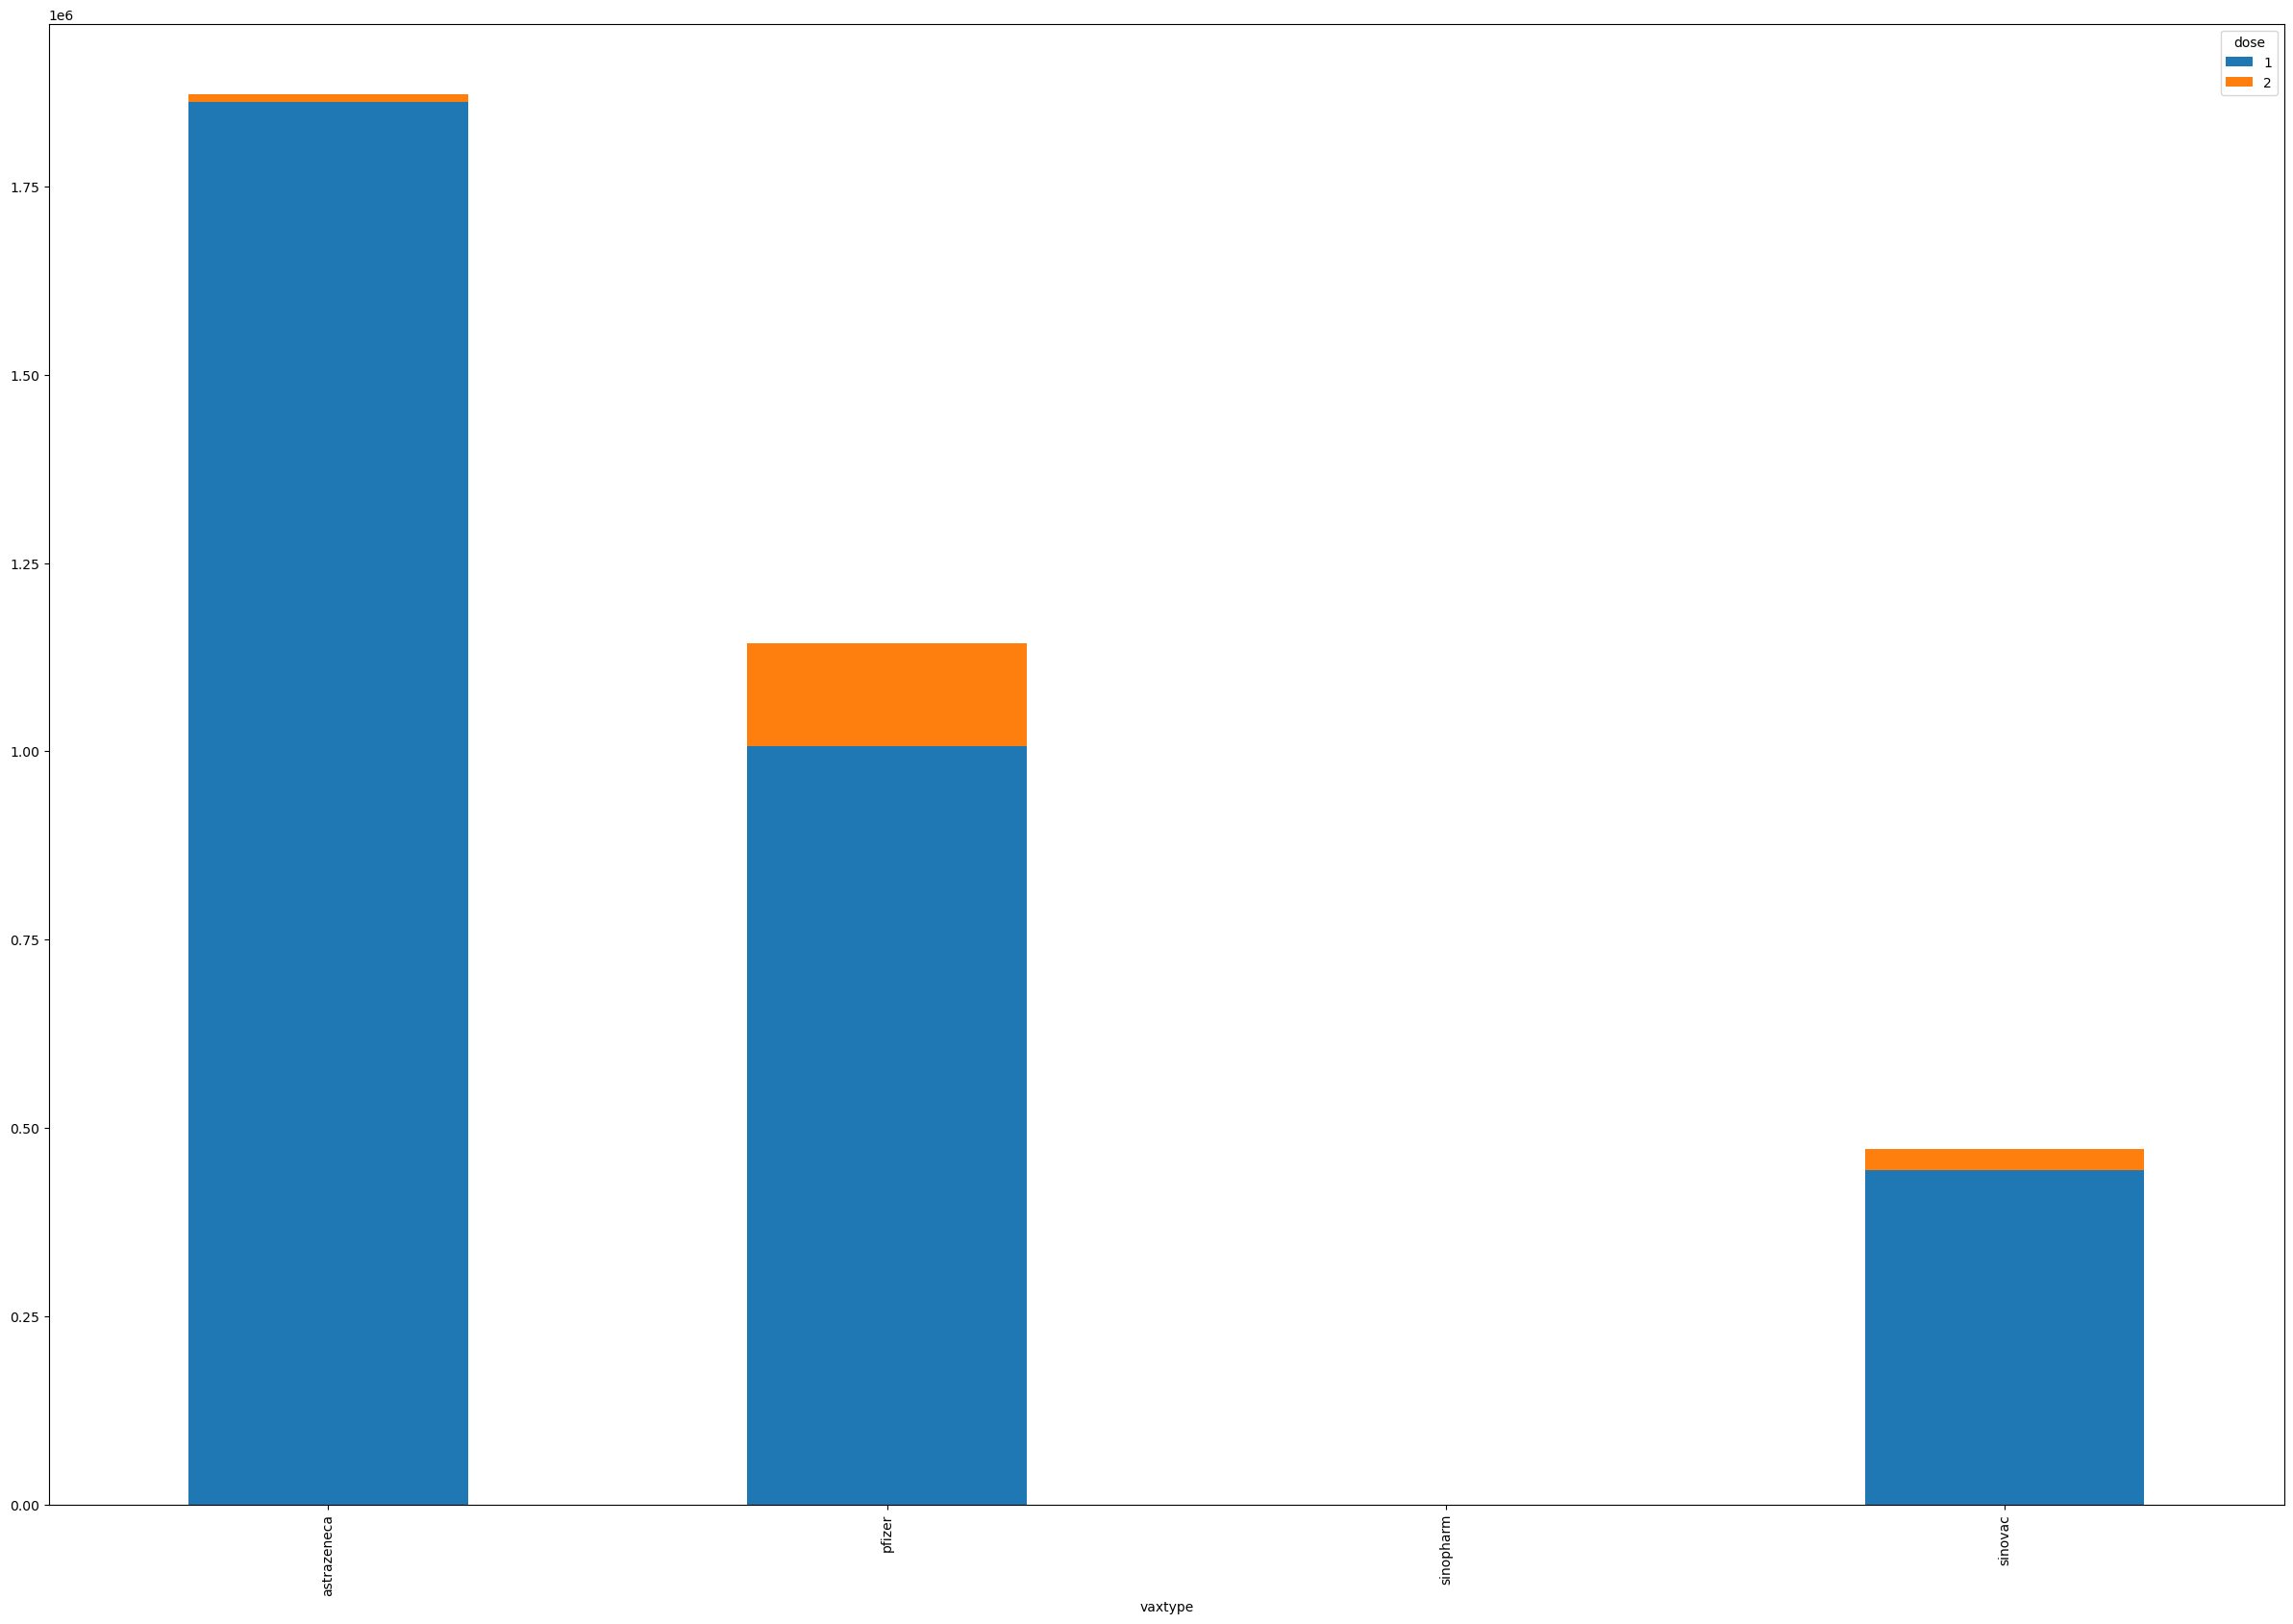

In [96]:
# barchart by vaccine brand
aefi_by_vaxtype = aefi_dose12_final.groupby(['vaxtype', 'dose'])['count'].sum().unstack().plot(kind='bar', stacked=True, figsize=(30,20))
aefi_by_vaxtype

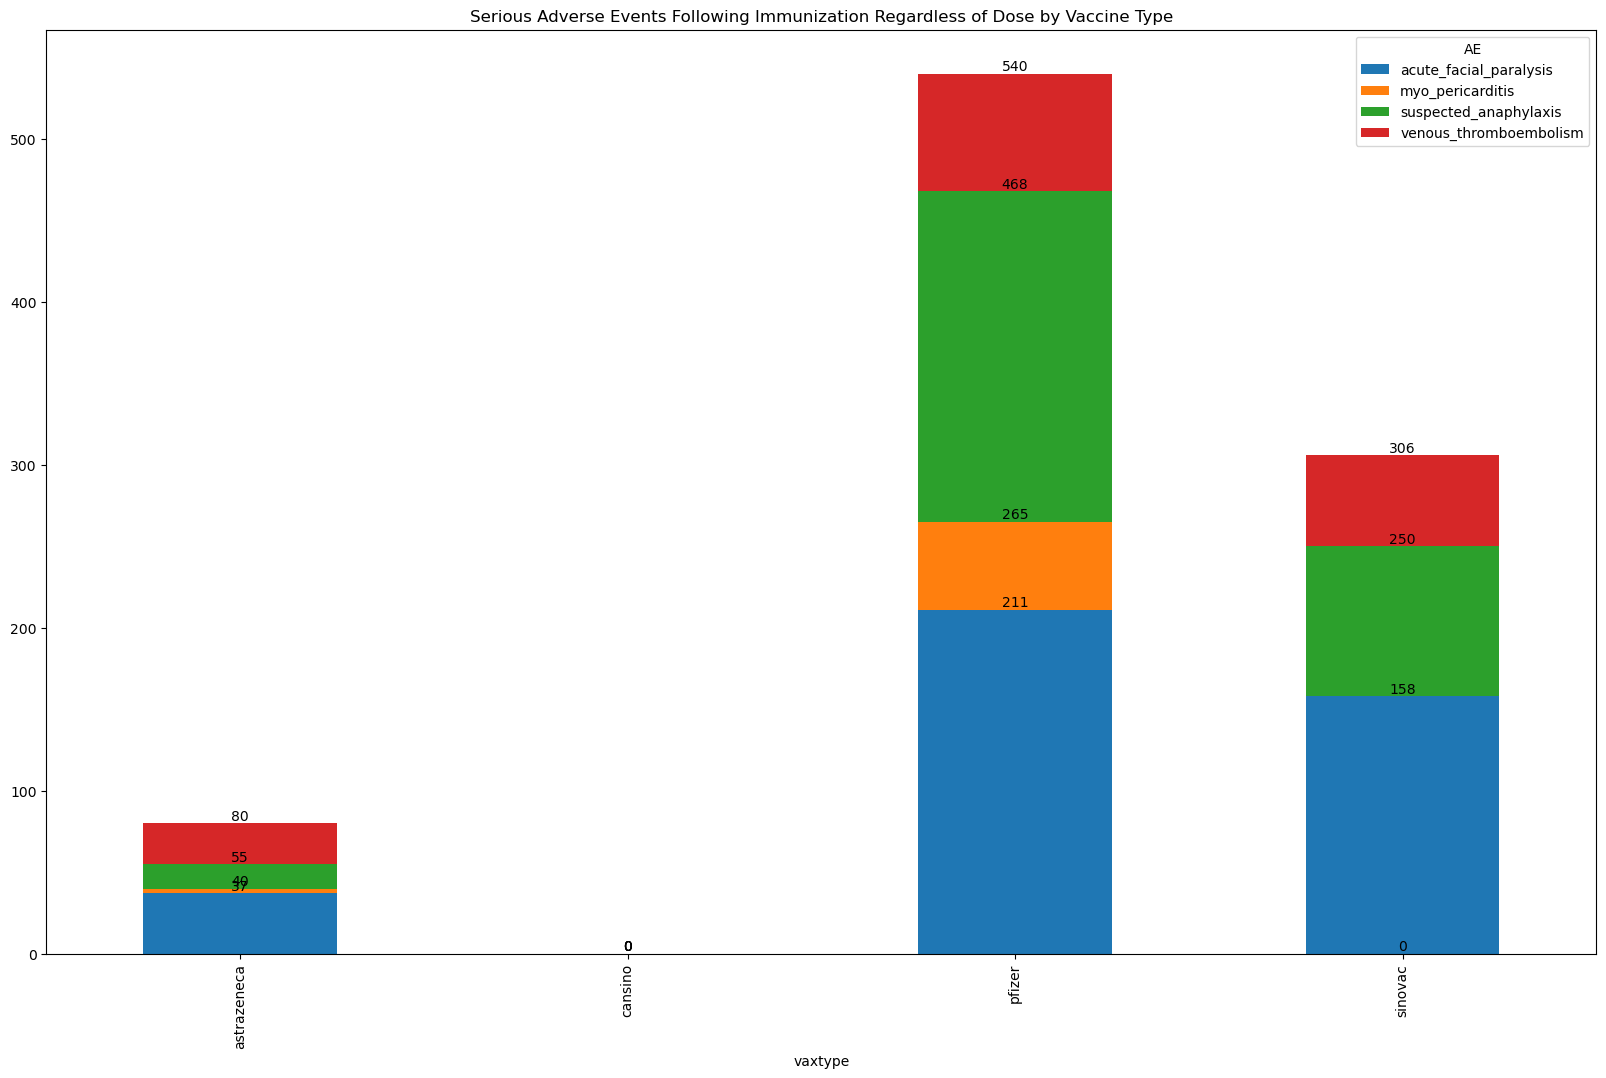

In [105]:
# barchart by date
aefi_serious_l_summ_bar = aefi_serious_l.groupby(['vaxtype', 'AE'])['count'].sum().unstack().plot(kind='bar', stacked=True, figsize=(20,12), 
                                                                                                  title = 'Serious Adverse Events Following Immunization Regardless of Dose by Vaccine Type')
aefi_serious_l_summ_bar

for container in aefi_serious_l_summ_bar.containers:
    aefi_serious_l_summ_bar.bar_label(container)